# Worldwide Governance Indicators

In [22]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")
seaborn.set(font_scale = 2)

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



In [23]:
wgi = pd.read_csv("https://fxjollois.github.io/donnees/WGI/wgi2019.csv")
wgi.head()

,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
4,Anguilla,AIA,NaN,1.367357,0.815824,0.846231,0.355737,1.234392


## Décrire rapidement les données

In [8]:
wgi.describe().round(2)

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
count,204.00,211.00,209.00,209.00,209.00,209.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.19,-2.77,-2.45,-2.40,-2.35,-1.77
25%,-0.79,-0.55,-0.68,-0.69,-0.72,-0.76
50%,0.09,0.07,-0.07,-0.11,-0.12,-0.18
75%,0.90,0.84,0.71,0.85,0.69,0.70
max,1.69,1.90,2.22,2.16,2.02,2.17


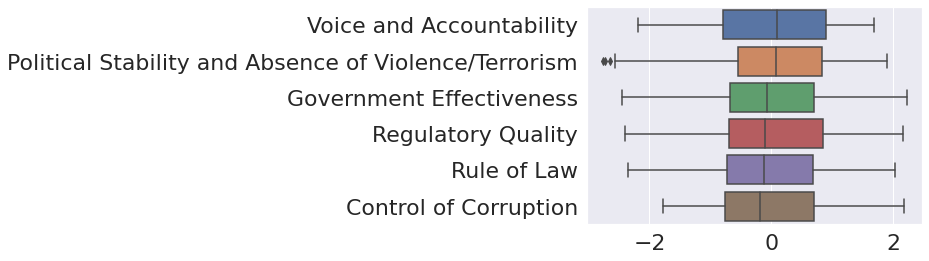

In [25]:
seaborn.boxplot(data = wgi, orient = "h")
plt.show()


## Réaliser une ACP

In [26]:
wgi2 = wgi[wgi.columns[2:]]
wgi2

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
4,NaN,1.367357,0.815824,0.846231,0.355737,1.234392
...,...,...,...,...,...,...
209,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551
210,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924
211,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931
212,-0.286199,-0.102216,-0.675215,-0.554269,-0.462069,-0.640345


In [37]:
#valeur manquante
wgi.isna().sum()
wgi_na= wgi.dropna()
wgi_na.shape

(202, 8)

In [39]:
wgi2 = wgi_na[wgi_na.columns[2:]]
wgi2.head()

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
5,0.151805,0.118570,-0.061331,0.274380,-0.411179,-0.528758


In [41]:
pca = PCA(n_components = 6)
pca.fit(wgi2)

PCA(n_components=6)

In [42]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[5.04959218 0.41467898 0.30759716 0.12165034 0.04965011 0.04069217]
[0.84386857 0.06929957 0.05140446 0.02032974 0.00829734 0.00680032]


In [44]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig



,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,5.049592,84.0,84.0
1,Dim2,0.414679,7.0,91.0
2,Dim3,0.307597,5.0,96.0
3,Dim4,0.121650,2.0,98.0
4,Dim5,0.049650,1.0,99.0
5,Dim6,0.040692,1.0,100.0


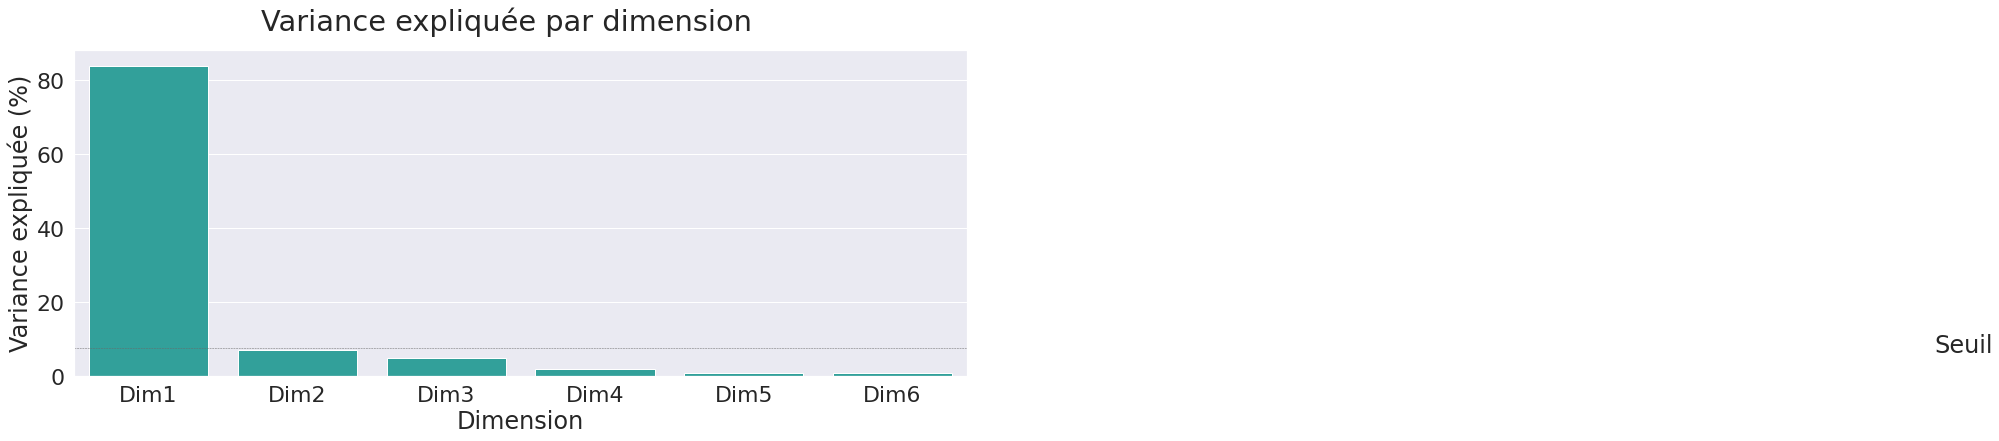

In [45]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
plt.text(12, 100/16, "Seuil")
plt.axhline(y = 100/13, linewidth = .5, color = "dimgray", linestyle = "--")
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

In [48]:
wgi_pca_df= pd.DataFrame(pca.transform(wgi2)).rename(columns = {i: "Dim"+str(i+1) for i in range(6)})
wgi_pca_df


,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6
0,-2.921523,0.503627,0.056127,0.152636,0.031572,0.082826
1,-3.630601,0.075195,0.445399,-0.165326,-0.194070,0.416103
2,3.704414,-0.846353,-1.093568,0.134714,-0.123744,-0.112983
3,2.083839,0.446336,0.242998,-0.215133,0.050528,-0.154599
4,0.137824,0.175896,-0.119501,-0.649779,-0.141887,-0.141638
...,...,...,...,...,...,...
197,0.134034,-0.035217,-0.094282,-0.400461,0.001850,0.095660
198,-0.469483,-0.010186,-0.579558,-0.067936,-0.351600,0.124790
199,3.856331,-0.236763,-0.284979,0.079236,-0.088370,-0.093258
200,1.060152,0.400094,0.080514,-0.119279,0.132326,0.005206
